##  1. Code for Downloading and Formatting the data

In [65]:
import numpy as np
import gzip
from keras.datasets import mnist
import matplotlib.pyplot as plt 
import time
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train=X_train.reshape(-1, 784).astype('float32') / 255
X_train=X_train[:50000]
X_test=X_test.reshape(-1, 784).astype('float32') / 255
#X_test=X_test[:50000]
label_row=len(Y_train)
label_col=Y_train.max()+1
encode=np.zeros((label_row,label_col),dtype='uint8')
encode[np.arange(label_row),Y_train]=1
Y_train=encode
Y_train=Y_train[:50000]
label_row=len(Y_test)
label_col=Y_test.max()+1
encode=np.zeros((label_row,label_col),dtype='uint8')
encode[np.arange(label_row),Y_test]=1
Y_test=encode
#Y_test=Y_test[:50000]

In [66]:
def make_mini_batches(X, y, batch_size,rep): 
    rand_index = np.random.choice(X.shape[0], batch_size, replace=rep)
    train_batch_image = X[rand_index]
    train_batch_label = y[rand_index]
    return  train_batch_image,train_batch_label

In [67]:
def funct(X,weights):
    return np.dot(X,weights)


In [68]:
def gradient(X, y, weights): 
    h = funct(X, weights) 
    grad = np.dot(X.transpose(), (h - y))
    return grad 

In [69]:
def cost(X, y, weights): 
    h = funct(X, weights) 
    J = np.square((h - y))
    J = np.sum(sum(J)) 
    J /= 2*X.shape[0]
    return J

In [70]:
def accufunct(X,y,weights):
    prediction=funct(X,weights)
    yval=np.argmax(y,axis=1)
    xval=np.argmax(prediction,axis=1)
    accuracy=sum(yval==xval)/y.shape[0]
    return accuracy

## 2. Minibatch function implementation 

In [71]:
def minibatch_gradientdecent(X, y, learning_rate, batch_size,iter, X_test, Y_test): 
    weight = np.zeros((X.shape[1], y.shape[1]))
    error_list = [] 
    accu_list=[]
    max_iters = iter
    for itr in range(max_iters): 
        X_mini, y_mini = make_mini_batches(X, y, batch_size,True) 
        weight = weight - learning_rate *(np.divide( gradient(X_mini, y_mini, weight),batch_size)) 
        error_list.append(cost(X, y, weight)) 
        accu_list.append(accufunct(X_test,Y_test,weight))
    return weight, error_list, accu_list

## 3. Running the SGD algorithm on different batch size

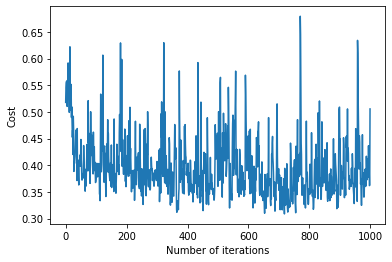

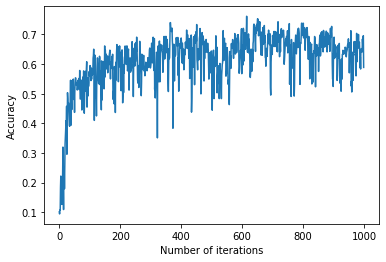

Highest accuray rate is  58.87 % For learning rate 0.01 ,and  Batch size: 1
Time taken to train the best accuracy batch is:  128.67172980308533 seconds


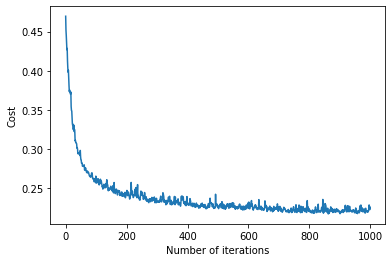

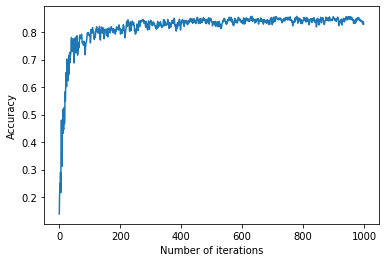

Highest accuray rate is  82.92 % For learning rate 0.01 ,and  Batch size: 10
Time taken to train the best accuracy batch is:  123.50839066505432 seconds


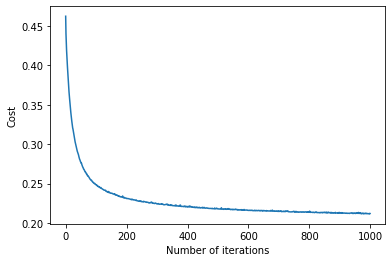

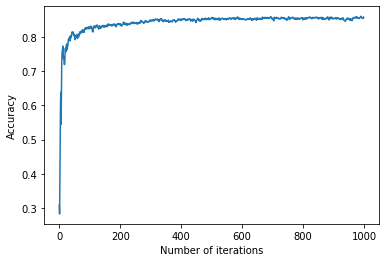

Highest accuray rate is  85.83 % For learning rate 0.01 ,and  Batch size: 100
Time taken to train the best accuracy batch is:  125.87500953674316 seconds


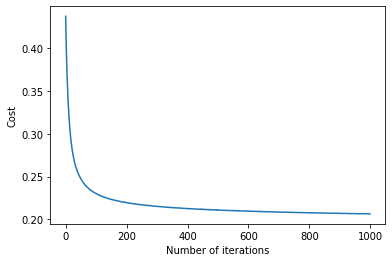

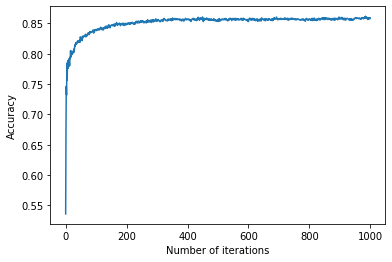

Highest accuray rate is  85.92999999999999 % For learning rate 0.02 ,and  Batch size: 1000
Time taken to train the best accuracy batch is:  1587795093.685526 seconds


In [86]:
batch_size=[1,10,100,1000]
learning_rate=[0.01,0.02,0.05]
iterations=1000
for i in batch_size:
    finalaccu_list=[]
    finalloss_list=[]
    bs=0
    lr=0
    max=0
    timetaken=time.time()
    for j in learning_rate:
            weights, error_list , accu_list= minibatch_gradientdecent(X_train, Y_train,j,i,iterations,X_test,Y_test) 
            if(accu_list[-1]>max):
                finalaccu_list=accu_list
                finalloss_list=error_list
                max=accu_list[-1]
                timetaken= time.time()-timetaken;
                bs=i
                lr=j
    plt.plot(finalloss_list) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    plt.plot(finalaccu_list) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Accuracy") 
    plt.show() 
    print("Highest accuray rate is ",(max*100),"% For learning rate",lr,",and  Batch size:",bs)
    print("Time taken to train the best accuracy batch is: ",(timetaken),"seconds")


### As we can see in the graph aboave I have determined the best learning for each batch size
### Batch size:1 ,  learning rate is - 0.01 with accuracy -58.87
### Batch size:10 ,  learning rate is - 0.01 with accuracy -82.92
### Batch size:100 ,  learning rate is - 0.01 with accuracy -85.83
### Batch size:1000 ,  learning rate is - 0.02 with accuracy -85.92

### So learning rate of 0.01 comes out to be a good learning as it is the bes under 4 batch sizes and among three different learning rates.

### I have kept iterations to be 1000 which is reasonably large.


## 4. As we can see the the bach size affects the accuracy to a great extent. As the batch size increases the accuray of our model also increases. But as the batch size becomes large enough the accuracy of model may not show good results. So it is better to chosse a batch size which remains in the middle range of total dataset size.

Input data size: 100 and the accuracy is: 66.9 %


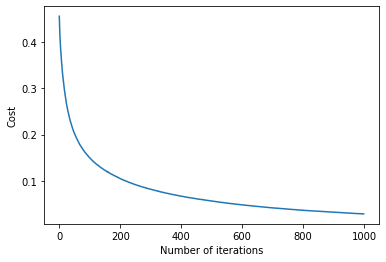

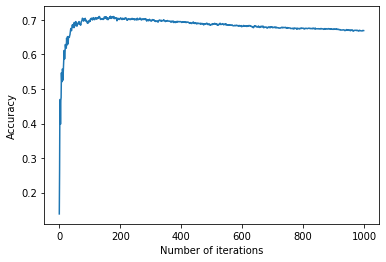

Input data size: 500 and the accuracy is: 81.25 %


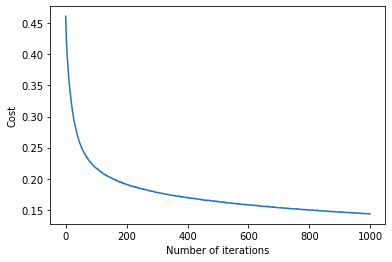

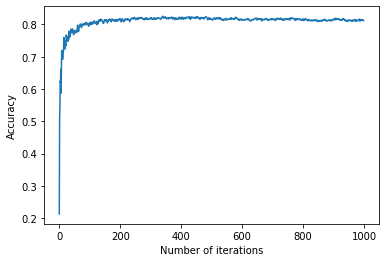

Input data size: 1000 and the accuracy is: 82.76 %


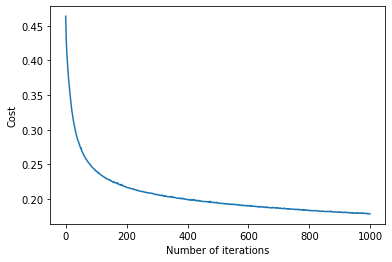

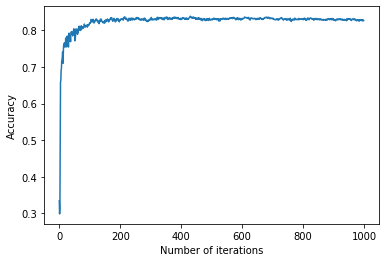

Input data size: 10000 and the accuracy is: 85.21 %


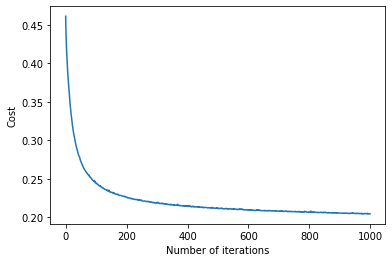

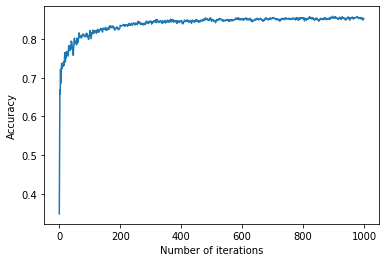

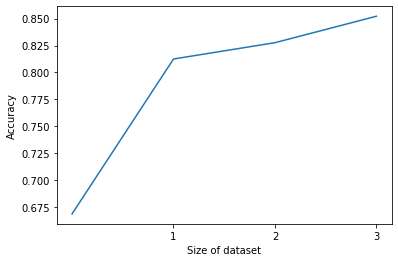

In [87]:
N=[100, 500,1000,10000]
result=[]
for n in N:
    X_train_new, Y_train_new = make_mini_batches(X_train, Y_train, n,False) 
    weights, error_list , accu_list= minibatch_gradientdecent(X_train_new, Y_train_new,0.01,100,1000,X_test,Y_test)
    plt.plot(error_list)
    print("Input data size:", n, "and the accuracy is:" ,accu_list[-1]*100,"%" )
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    plt.plot(accu_list) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Accuracy") 
    plt.show()
    result.append(accu_list[-1])
plt.plot(result) 
plt.xlabel("Size of dataset") 
plt.xticks(np.arange(1, 4, 1.0))
plt.ylabel("Accuracy") 
plt.show() 

## 5. Fixed a batch sizeof 100 and trained the model over different data set size of 100,500,1000,10000. The accuracy of our model increases as we increase the dataset size. This implies that more the the number of images the more the odel learns how to classify the test images. 

## 6. Bonus attempt using Pytorch

In [88]:
import torch
from torch.autograd import Variable
batch_size = 100
batches = 1000
step_size = 0.01
train_loss=[];
test_accuracy=[];
linear = torch.nn.Linear(784, 10)

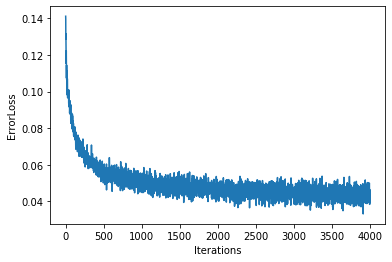

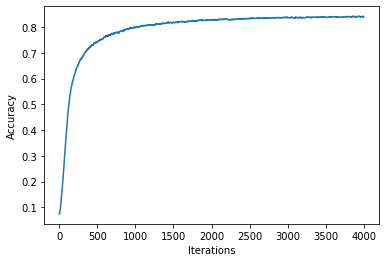

In [92]:
criterion = torch.nn.MSELoss()
optimiser = torch.optim.SGD(linear.parameters(), lr = step_size)
test_classes_tensor = Variable(torch.from_numpy(Y_train))
initial_time = time.time()
for i in range(batches):
    train_image, train_label =make_mini_batches(X_train, Y_train, batch_size,True) 
    input_images = Variable(torch.from_numpy(train_image))
    labels = Variable(torch.from_numpy(train_label))
    optimiser.zero_grad()
    out = linear(input_images.float())
    loss = criterion(out, labels.float())
    loss.backward()
    optimiser.step()
    train_loss.append(loss)
    test_image_tensor=Variable(torch.from_numpy(X_train))
    predict = linear(test_image_tensor.float())
    val1, y_predict = torch.max(predict,1)
    val2, y = torch.max(test_classes_tensor,1)
    test_accuracy.append(sum(y_predict == y)/float(len(y)))
    
final_time = time.time() - initial_time

final_acc = 100*(test_accuracy[-1])

a = "Using pytorch Test accuracy is: "+str(final_acc)+"% "+"and Execution Time: "+ str(final_time)

plt.xlabel('Iterations')
plt.ylabel('ErrorLoss')
plt.plot(train_loss)
plt.show()

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.plot(test_accuracy)

plt.show()


In [93]:
print(a)

Using pytorch Test accuracy is: tensor(83.9520)% and Execution Time: 279.3144381046295
